# 1 Data wrangling <a id='_Data_wrangling'></a>

## 1.1 Table of Contents <a id='1.1_Contents'></a>
* [1 Data wrangling](#1_Data_wrangling)
  * [1.1 Table of Contents](#1.1_Contents)
  * [1.2 Introduction & Objective](#1.2_Introduction_&_Objective)
  * [1.3 Imports](#1.3_Imports)
  * [1.4 Load Data](#1.4_Load_Data)
  * [1.5 Explore the Data](#1.5_Explore_the_Data)
    * [1.5.1 Shape of data & Structure](#1.5.1_Shape_data)
    * [1.5.2 General Info, Missing Values, and Duplicates](#1.5.2_General_Info)
    * [1.5.3 Exploring Categorical Variables](#1.5.3_Categorical_Variables)
    * [1.5.4 Exploring Numerical Variables](#1.5.4_Numerical_Variables)
    * [1.5.5 Data Highlights](#1.5.5_Data_Highlights)
  * [1.6 Data Cleaning](#1.6_Data_Cleaning)

## 1.2 Introduction & Objective <a id='1.2_Introduction_&_Objective'></a>

ADD SOMETHING HERE

## 1.3 Imports <a id='1.3_Imports'></a>

In [26]:
#Import pandas, matplotlib.pyplot, and seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
import numpy as np

from library.sb_utils import save_file

## 1.4 Load Data <a id='1.4_Load_Data'></a>

In [2]:
# Reading csv files and dividing them into different variables

train_data = pd.read_csv('/Users/magdalenamasello/Documents/Work/DataScience/Bootcamp/Projects/CapstoneProjectTwo/CapstoneTwo/RawData/train.csv')
test_data = pd.read_csv('/Users/magdalenamasello/Documents/Work/DataScience/Bootcamp/Projects/CapstoneProjectTwo/CapstoneTwo/RawData/test.csv')
submission_data = pd.read_csv('/Users/magdalenamasello/Documents/Work/DataScience/Bootcamp/Projects/CapstoneProjectTwo/CapstoneTwo/RawData/sample_submission.csv')

## 1.5 Explore the Data <a id='1.5_Explore_the_Data'></a>

### 1.5.1 Shape of data & Structure <a id='1.5.1_Shape_data'></a>

In [3]:
#Let's check the Shape of data
print(f'The Train dataset has {train_data.shape[0]} rows and {train_data.shape[1]} columns')
print(f'The Test dataset has {test_data.shape[0]} rows and {test_data.shape[1]} columns')

The Train dataset has 20758 rows and 18 columns
The Test dataset has 13840 rows and 17 columns


In [4]:
#Call the head method to take a look at train data
train_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
#Call the head method to take a look at train data
test_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


### 1.5.2 General Info, Missing Values, and Duplicates <a id='1.5.2_General_Info'></a>

In [32]:
import pandas as pd

def custom_summary(df):
    # Initialize an empty DataFrame to store summary information
    summary_df = pd.DataFrame(columns=['Data Type', '# Missing Values', '# Unique Values', 'Min', 'Max', 'Mean', 'Mode/Top Value', 'Top Value Freq', 'Median', 'Std Dev'])
    
    # Loop through each column in the DataFrame
    for column in df.columns:
        # Calculate summary statistics
        dtype = df[column].dtype  # Data type
        missing_values = df[column].isnull().sum()  # Number of missing values
        num_unique = df[column].nunique()  # Number of unique values
        
        if df[column].dtype == 'object':
            min_value = 'nan'  # Minimum value (not applicable for categorical variables)
            max_value = 'nan'  # Maximum value (not applicable for categorical variables)
            mean_value = 'nan'  # Mean (not applicable for categorical variables)
            mode_value = df[column].mode().iloc[0] if num_unique > 1 else df[column].iloc[0]  # Mode for numerical, top value for categorical
            top_value_freq = df[column].value_counts().iloc[0]  # Frequency of top value
            median_value = 'nan'  # Median (not applicable for categorical variables)
            std_dev_value = 'nan'  # Standard deviation (not applicable for categorical variables)
        else:
            min_value = df[column].min()  # Minimum value
            max_value = df[column].max()  # Maximum value
            mean_value = df[column].mean()  # Mean
            mode_value = df[column].mode().iloc[0]  # Mode
            top_value_freq = 'nan'  # Frequency of top value (not applicable for numerical variables)
            median_value = df[column].median()  # Median
            std_dev_value = df[column].std()  # Standard deviation
        
        # Add summary information to the DataFrame
        summary_df.loc[column] = [dtype, missing_values, num_unique, min_value, max_value, mean_value, mode_value, top_value_freq, median_value, std_dev_value]
    
    return summary_df

# Call the custom summary function
summary_table = custom_summary(train_data.drop(columns=["id"]))

# Apply left alignment for text
summary_table_styled = summary_table.style.set_properties(**{'text-align': 'left'})

# Apply left alignment for variable names (column headers)
summary_table_styled.set_table_styles([{'selector': 'th', 'props': [('text-align', 'left')]}])

,Data Type,# Missing Values,# Unique Values,Min,Max,Mean,Mode/Top Value,Top Value Freq,Median,Std Dev
Gender,object,0,2,nan,nan,nan,Female,10422,nan,nan
Age,float64,0,1703,14.000000,61.000000,23.841804,18.000000,nan,22.815416,5.688072
Height,float64,0,1833,1.450000,1.975663,1.700245,1.700000,nan,1.700000,0.087312
Weight,float64,0,1979,39.000000,165.057269,87.887768,80.000000,nan,84.064875,26.379443
family_history_with_overweight,object,0,2,nan,nan,nan,yes,17014,nan,nan
FAVC,object,0,2,nan,nan,nan,yes,18982,nan,nan
FCVC,float64,0,934,1.000000,3.000000,2.445908,3.000000,nan,2.393837,0.533218
NCP,float64,0,689,1.000000,4.000000,2.761332,3.000000,nan,3.000000,0.705375
CAEC,object,0,4,nan,nan,nan,Sometimes,17529,nan,nan
SMOKE,object,0,2,nan,nan,nan,no,20513,nan,nan


In [10]:
# Check for duplicate rows in the entire DataFrame
duplicates = train_data.duplicated()

# Check if there are any duplicate rows
if duplicates.any():
    print("Duplicates found!")
    # Display the duplicate rows
    duplicate_rows = train_data[duplicates]
    print(duplicate_rows)
else:
    print("No duplicates found.")

No duplicates found.


### 1.5.3 Exploring Categorical Variables <a id='1.5.3_Categorical_Variables'></a>

In [11]:
# Identify categorical columns
categorical_columns = train_data.select_dtypes(include=['object']).columns

# Counts and percents unique values for categorical columns
print("Counts and Percents Unique Values for Categorical Columns:")
for column in categorical_columns:
    unique_counts = train_data[column].value_counts()
    percent_unique = (unique_counts / len(train_data)) * 100
    print(f"Column: {column}")
    print(unique_counts)
    print(percent_unique)
    print()


Counts and Percents Unique Values for Categorical Columns:
Column: Gender
Gender
Female    10422
Male      10336
Name: count, dtype: int64
Gender
Female    50.207149
Male      49.792851
Name: count, dtype: float64

Column: family_history_with_overweight
family_history_with_overweight
yes    17014
no      3744
Name: count, dtype: int64
family_history_with_overweight
yes    81.96358
no     18.03642
Name: count, dtype: float64

Column: FAVC
FAVC
yes    18982
no      1776
Name: count, dtype: int64
FAVC
yes    91.444262
no      8.555738
Name: count, dtype: float64

Column: CAEC
CAEC
Sometimes     17529
Frequently     2472
Always          478
no              279
Name: count, dtype: int64
CAEC
Sometimes     84.444551
Frequently    11.908662
Always         2.302727
no             1.344060
Name: count, dtype: float64

Column: SMOKE
SMOKE
no     20513
yes      245
Name: count, dtype: int64
SMOKE
no     98.819732
yes     1.180268
Name: count, dtype: float64

Column: SCC
SCC
no     20071
yes      

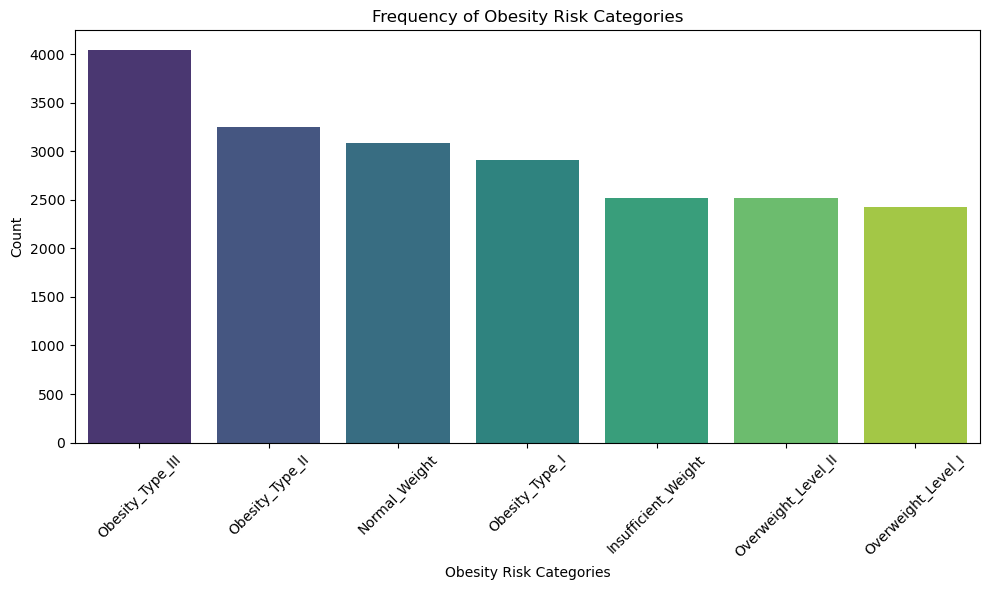

In [12]:
# Calculate the frequency of each category in the 'NObeyesdad' column
obesity_counts = train_data['NObeyesdad'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=obesity_counts.index, y=obesity_counts.values, palette="viridis")

# Add labels and title
plt.title('Frequency of Obesity Risk Categories')
plt.xlabel('Obesity Risk Categories')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

### 1.5.4 Exploring Numerical Variables <a id='1.5.3_Numerical_Variables'></a>

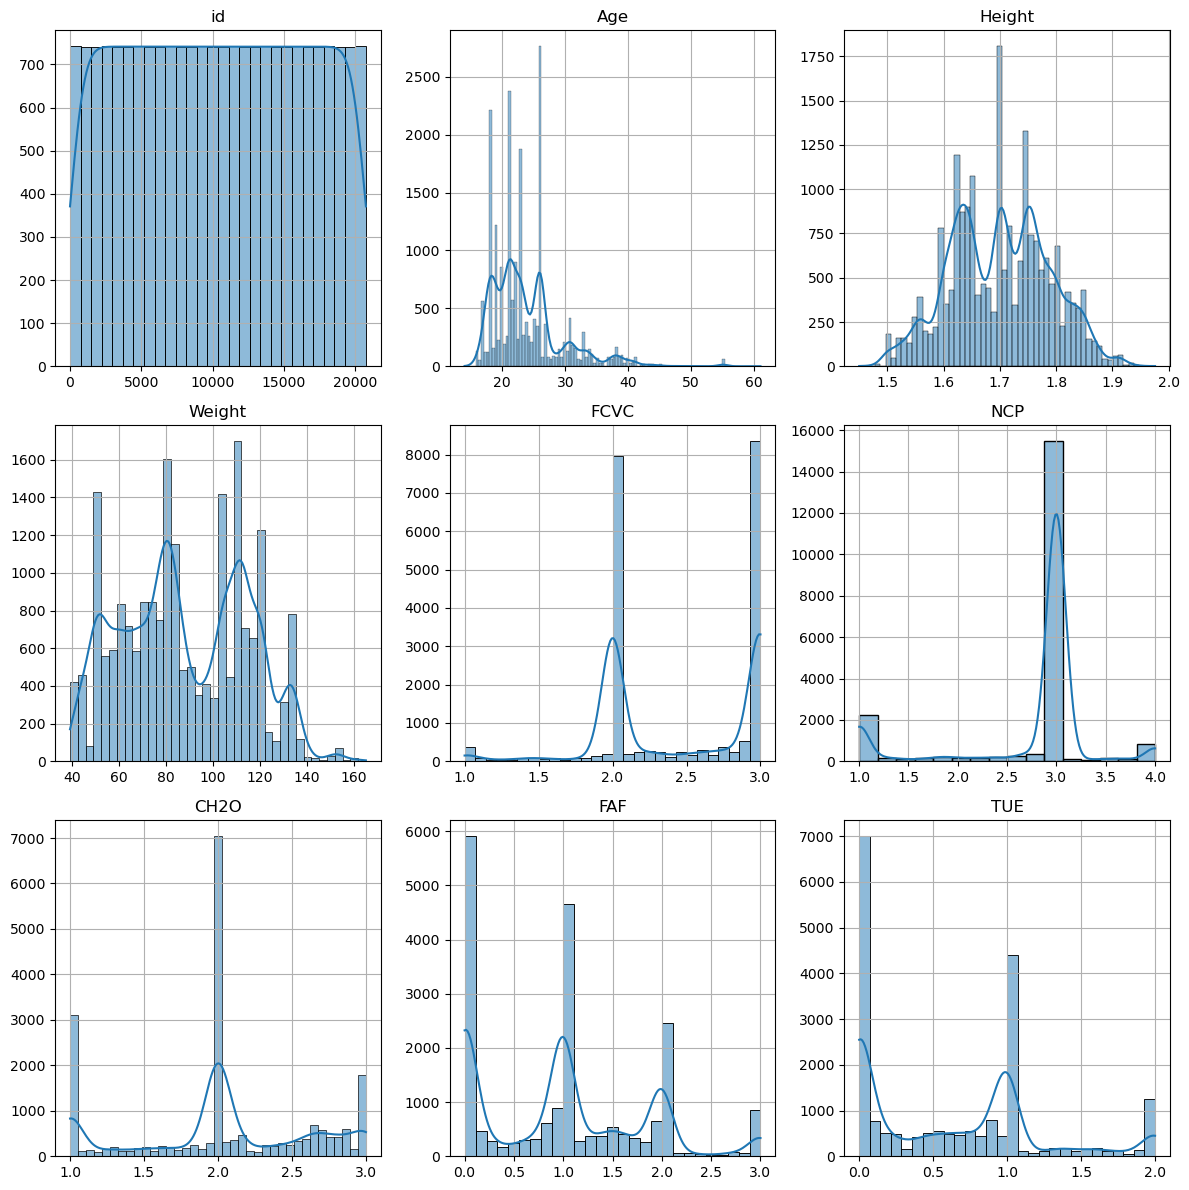

In [18]:
# Identify numerical columns
numerical_columns = train_data.select_dtypes(include=['float64', 'int64']).columns

# Calculate number of rows and columns for subplots
num_plots = len(numerical_columns)
num_rows = math.ceil(num_plots / 3)
num_cols = min(num_plots, 3)

# Set up the figure and axes
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 4*num_rows))
axes = axes.flatten()

# Create histograms for each numerical column
for i, column in enumerate(numerical_columns):
    ax = axes[i]
    sns.histplot(train_data[column], ax=ax, kde=True)
    ax.set_title(column)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

### 1.5.5 Data Highlights <a id='1.5.5_Data_Highlights'></a>

About the Data:

• The train dataset contains 20758 rows and 18 columns

• There are no missing or duplicate values in any of the columns.

## 1.6 Data Cleaning <a id='1.6_Data Cleaning'></a>